In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline


print('Libraries imported.')

C:\Users\divij\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\divij\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\divij\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\divij\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

Libraries imported.


In [2]:
column_names = ['serial', 'date', 'age', 'distance', 'stores', 'latitude', 'longitude', 'price']

In [3]:
df = pd.read_csv('data.csv', names=column_names)
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


In [4]:
df.isna().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

In [5]:
df.describe()

,serial,date,age,distance,stores,latitude,longitude,price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2499.500000,2008.912800,18.945000,4.977800,4.915000,84.97140,124.994200,13906.638600
std,1443.520003,5.457578,11.329539,3.199837,3.142889,3.16199,3.167992,1020.774876
min,0.000000,2000.000000,0.000000,0.000000,0.000000,80.00000,120.000000,11263.000000
25%,1249.750000,2004.000000,9.000000,2.000000,2.000000,82.00000,122.000000,13197.750000
50%,2499.500000,2009.000000,19.000000,5.000000,5.000000,85.00000,125.000000,13893.500000
75%,3749.250000,2014.000000,29.000000,8.000000,8.000000,88.00000,128.000000,14614.000000
max,4999.000000,2018.000000,38.000000,10.000000,10.000000,90.00000,130.000000,16964.000000


## Normalizing Data

In [6]:
df = df.iloc[:, 1:]
df_norm = (df - df.mean())/df.std()
df_norm.head()

,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


In [7]:
## To get actual values 
y_mean = df['price'].mean()
y_std = df['price'].std()

def label_convert(x):
    return int(x * y_std + y_mean)

In [8]:
## Train-test split

x = df_norm.iloc[:, 0:6]
y = df_norm.iloc[:,-1]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.05, random_state = 42)



In [9]:
## Building Model

def get_model():
    model = Sequential([
        
        Dense(10, input_shape = (6,), activation='relu'),
        Dense(20,  activation='relu'),
        Dense(5,  activation='relu'),
        Dense(1)     
        
    ])
    
    model.compile(
        loss='mse',
        optimizer='adam'
    )
    
    return model

get_model().summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                70        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


## When to Stop Model? Using Validation Loss

In [10]:
es_cb = EarlyStopping(monitor='val_loss', patience=5)
model = get_model()
preds_on_untrained = model.predict(x_test)

history = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 100,
    callbacks = [es_cb]
)

Train on 4750 samples, validate on 250 samples
Epoch 1/100
4750/4750 [==============================] - 0s 76us/sample - loss: 0.5076 - val_loss: 0.2801
Epoch 2/100
4750/4750 [==============================] - 0s 25us/sample - loss: 0.2077 - val_loss: 0.2156
Epoch 3/100
4750/4750 [==============================] - 0s 31us/sample - loss: 0.1813 - val_loss: 0.1994
Epoch 4/100
4750/4750 [==============================] - 0s 33us/sample - loss: 0.1729 - val_loss: 0.1913
Epoch 5/100
4750/4750 [==============================] - 0s 31us/sample - loss: 0.1677 - val_loss: 0.1838
Epoch 6/100
4750/4750 [==============================] - 0s 31us/sample - loss: 0.1648 - val_loss: 0.1832
Epoch 7/100
4750/4750 [==============================] - 0s 29us/sample - loss: 0.1623 - val_loss: 0.1799
Epoch 8/100
4750/4750 [==============================] - 0s 34us/sample - loss: 0.1608 - val_loss: 0.1803
Epoch 9/100
4750/4750 [==============================] - 0s 37us/sample - loss: 0.1592 - val_loss: 0.1751

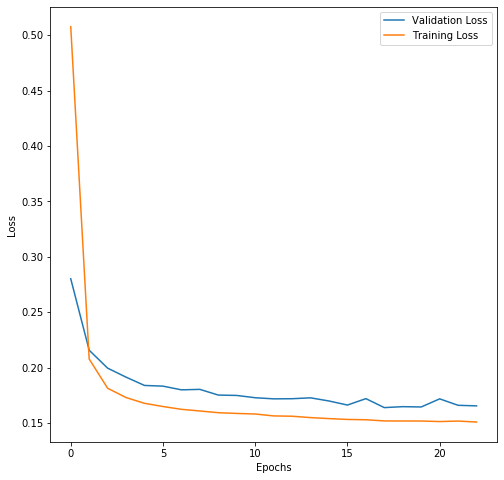

In [11]:
## Plotting
h = history.history
x_lim = len(h['loss'])
plt.figure(figsize=(8,8))
plt.plot(range(x_lim), h['val_loss'], label = 'Validation Loss')
plt.plot(range(x_lim), h['loss'], label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Predictions

In [12]:
preds_on_trained = model.predict(x_test)

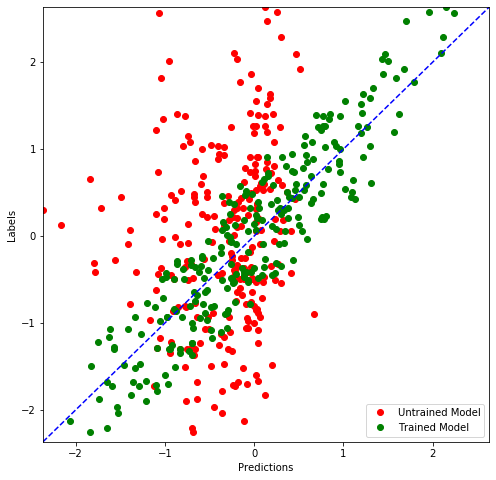

In [18]:
def compare_preds(preds_on_untrained, preds_on_trained, y_test):

    plt.figure(figsize=(8,8))
    plt.plot(preds_on_untrained, y_test, 'ro', label = 'Untrained Model')
    plt.plot(preds_on_trained, y_test, 'go', label='Trained Model')
    plt.xlabel('Predictions')
    plt.ylabel('Labels')

    y_min = min(min(y_test), min(preds_on_untrained), min(preds_on_trained))
    y_max = max(max(y_test), max(preds_on_untrained), max(preds_on_trained))

    plt.xlim([y_min, y_max])
    plt.ylim([y_min, y_max])
    plt.plot([y_min, y_max], [y_min, y_max], 'b--')
    plt.legend()
    plt.show()
    
compare_preds(preds_on_untrained, preds_on_trained, y_test)

In [15]:
price_untrained = [label_convert(y) for y in preds_on_untrained]
price_trained = [label_convert(y) for y in preds_on_trained]
price_test = [label_convert(y) for y in y_test]

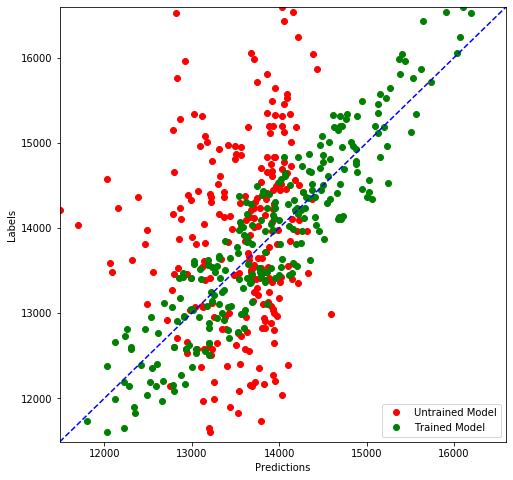

In [19]:
compare_preds(price_untrained, price_trained, price_test)